*last update 20201231*

*by MAK*

# Mounting Gdrive

In [ ]:
from google.colab import drive
from google.colab import files
print('mounting Google drive')
drive.mount('/content/drive/')
print('acessed granted. Moving to ColabTemp directory')
import os
%cd /content/drive/My\ Drive/ColabTemp/
%ls
!echo current directory is $(pwd)

mounting Google drive
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
acessed granted. Moving to ColabTemp directory
/content/drive/My Drive/ColabTemp
'=3.8'   ExSysR.ipynb   RamanSpectra.xlsx   RcNN.ipynb   rxtDPD.ipynb
current directory is /content/drive/My Drive/ColabTemp


# Reading deposited Raman data 



and averaging over temperatures while smoothing and trimming to Spectra within (400, 3700) cm-1.

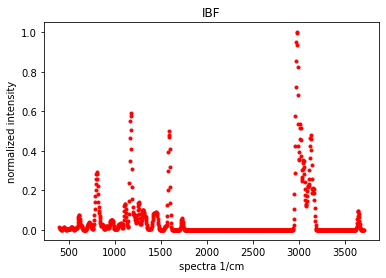

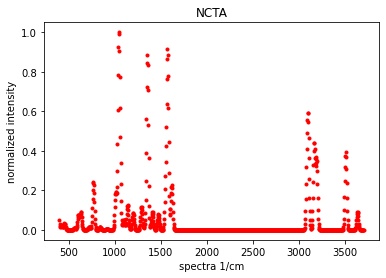

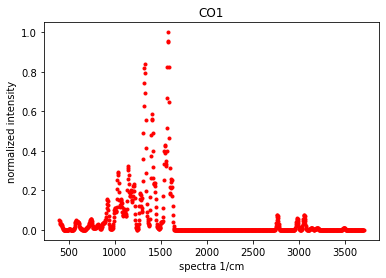

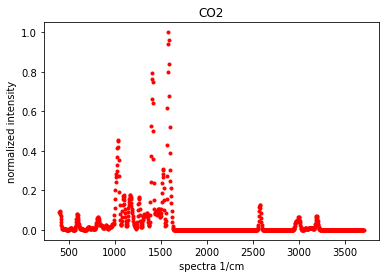

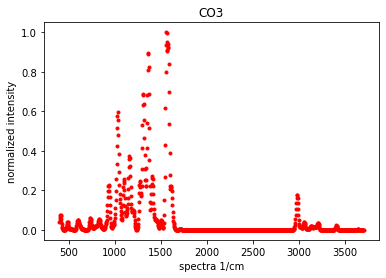

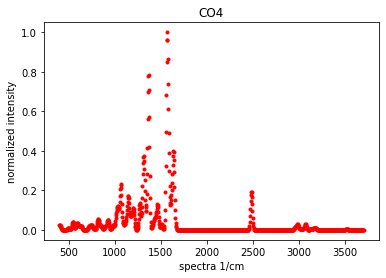

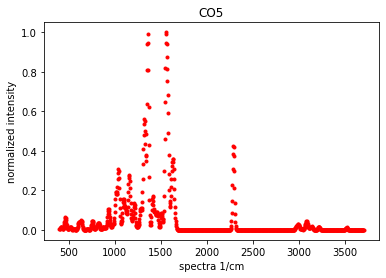

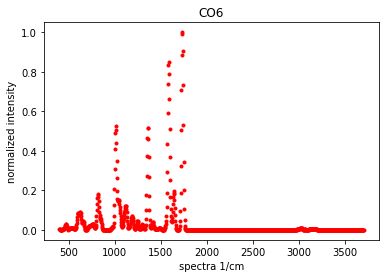

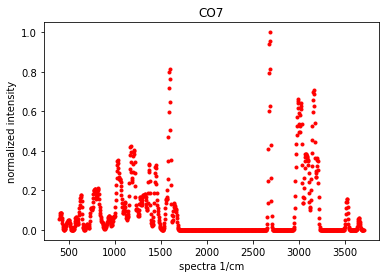

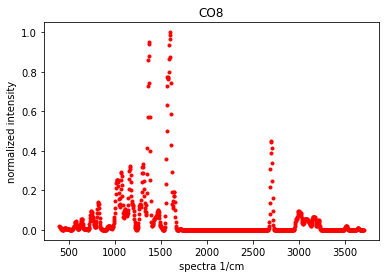

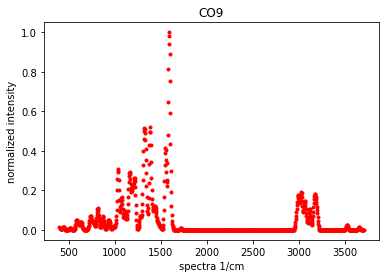

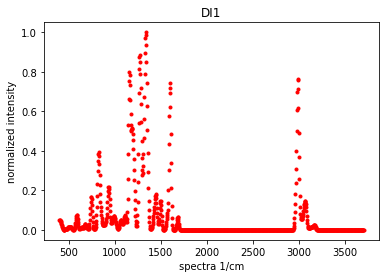

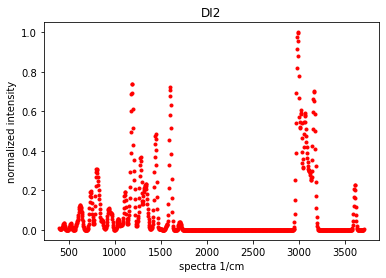

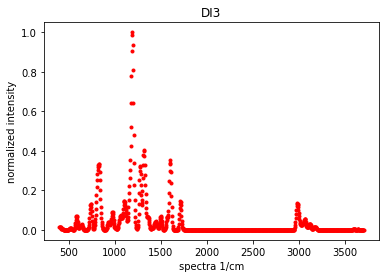

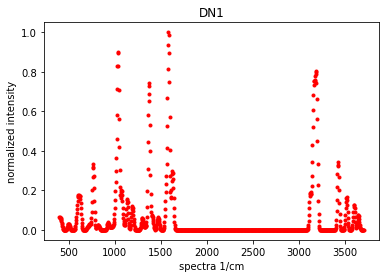

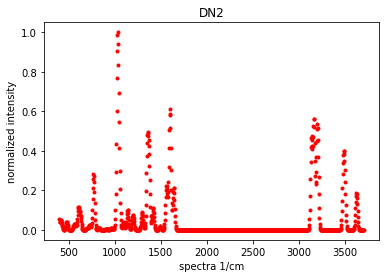

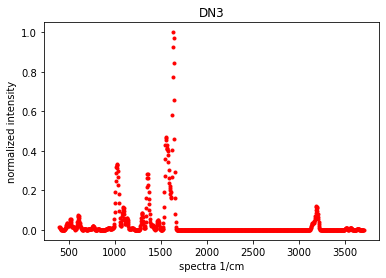

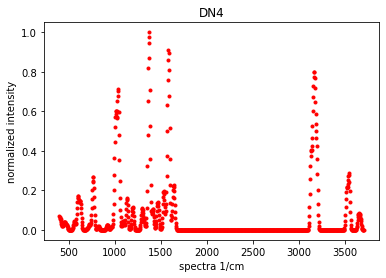

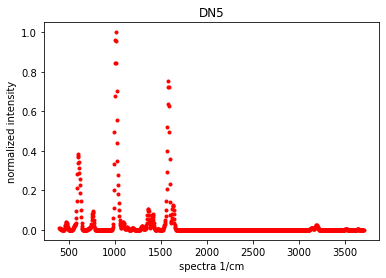

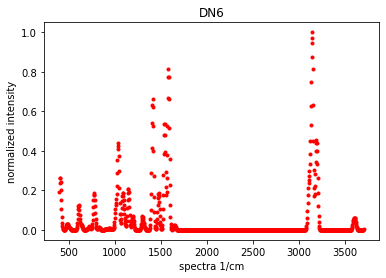

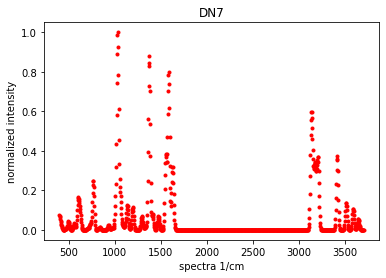

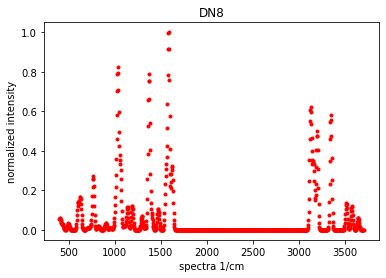

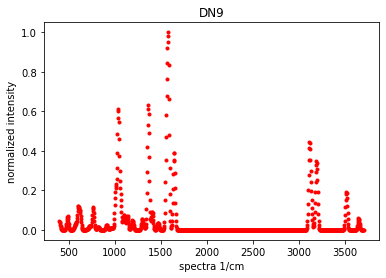

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
file = 'RamanSpectra.xlsx'
xl = pd.ExcelFile(file)
List = xl.sheet_names
"""
print('Data in EXCLE file are taged as: ')
print(List)
"""
xs = np.linspace(400, 3700, 1000)
FP_norm = np.transpose(xs)
FP_avg = np.transpose(xs)
for item in List: 
  """
  print(item)
  """
  data = xl.parse(item)
  np_data = data.to_numpy()
  tr_data = np_data[ np.where( np_data[:, 0] > 400 ) ]
  x298 = tr_data[:, 0]
  y298 = tr_data[:, 1]
  spl = UnivariateSpline(x298, y298)
  spl.set_smoothing_factor(0.00000001)
  ys298 = spl(xs)
  x343 = tr_data[:, 2]
  y343 = tr_data[:, 3]
  spl = UnivariateSpline(x343, y343)
  spl.set_smoothing_factor(0.00000001)
  ys343 = spl(xs)
  x353 = tr_data[:, 4]
  y353 = tr_data[:, 5]
  spl = UnivariateSpline(x353, y353)
  spl.set_smoothing_factor(0.00000001)
  ys353= spl(xs)
  x363 = tr_data[:, 6]
  y363 = tr_data[:, 7]
  spl = UnivariateSpline(x363, y363)
  spl.set_smoothing_factor(0.00000001)
  ys363 = spl(xs)
  x_avg = xs
  y_avg = (ys298 + ys343 + ys353 + ys363) / 4
  y_avg = abs(y_avg)
  """
  plt.figure()
  plt.plot(xs, y_avg, 'r--', \
           xs, ys298, 'bs', \
           xs, ys343, 'g^', \
           xs, ys353, 'b.', \
           xs, ys363, 'g.--',)
  plt.xlabel('spectra 1/cm')
  plt.ylabel('intensity')
  plt.title(item)
  plt.show()
  """
  FP_avg = np.vstack((FP_avg, np.transpose(y_avg)))
  # Normalizing .... 
  MIN = y_avg.min()
  if MIN == 0:
    MIN = 1e-8
  MAX = y_avg.max()
  norm_y = (y_avg - MIN) / (MAX - MIN)
  #"""
  plt.figure()
  plt.plot(xs, norm_y, 'r.') 
  plt.xlabel('spectra 1/cm')
  plt.ylabel('normalized intensity')
  plt.title(item)
  plt.show()
  #"""
  FP_norm = np.vstack((FP_norm, np.transpose(norm_y)))

# Noise reduction from fingerprints 

In [ ]:
FP_avg_clean = FP_avg
FP_norm_clean = FP_norm
for item in range(1,FP_avg.shape[0]):
  """
  print(List[item-1])
  """
  if 'IBF' in List[item-1]:
    """
    print('only -IBF-')
    """
    FP_avg_clean[item,:] = FP_avg_clean[item,:] - FP_avg[1,:]
    FP_norm_clean[item,:] = FP_norm_clean[item,:] - FP_norm[1,:]
    """
    print('cleaned noise from -IBF-')
    """
  if 'NCTA' in List[item-1]:
    """
    print('only -NCTA-')
    """
    FP_avg_clean[item,:] = FP_avg_clean[item,:] - FP_avg[2,:]
    FP_norm_clean[item,:] = FP_norm_clean[item,:] - FP_norm[2,:]
    """
    print('cleaned noise from -NCTA-')
    """
  if 'DI' in List[item-1]:
    """
    print('contains -IBF- dimer')
    """
    FP_avg_clean[item,:] = FP_avg_clean[item,:] - 2 * FP_avg[1,:]
    FP_norm_clean[item,:] = FP_norm_clean[item,:] - 2 * FP_norm[1,:]
    """
    print('cleaned noise from -IBF- dimer')
    """
  if 'DN' in List[item-1]:
    """
    print('contains - NCTA- dimer')
    """
    FP_avg_clean[item,:] = FP_avg_clean[item,:] - 2 * FP_avg[2,:]
    FP_norm_clean[item,:] = FP_norm_clean[item,:] - 2 * FP_norm[2,:]
    """
    print('cleaned noise from - NCTA- dimer')
    """
  if 'CO' in List[item-1]:
    """
    print('contains -NCTA- and -IBF- CoCryst')
    """
    FP_avg_clean[item,:] = FP_avg_clean[item,:] - FP_avg[1,:] - FP_avg[2,:]
    FP_norm_clean[item,:] = FP_norm_clean[item,:] - FP_avg[1,:] - FP_avg[2,:]
    """
    print('cleaned noise from -NCTA- and -IBF- CoCryst')
    """

Visualizing noise cleaning

In [ ]:
"""
print('visualizing noise cleaning ...')
for item in range(1,FP_norm_clean.shape[0]):
  print(List[item-1])
  plt.figure()
  plt.plot(xs, FP_norm_clean[item,:], 'r--', \
           xs, FP_norm[item,:], 'b.')
  plt.xlabel('spectra 1/cm')
  plt.ylabel('normalized intensity')
  plt.title(item)
  plt.show()
  plt.figure()
  plt.plot(xs, FP_avg_clean[item,:], 'r--', \
           xs, FP_avg[item,:], 'b.')
  plt.xlabel('spectra 1/cm')
  plt.ylabel('averaged intensity')
  plt.title(item)
  plt.show()
  """

"\nprint('visualizing noise cleaning ...')\nfor item in range(1,FP_norm_clean.shape[0]):\n  print(List[item-1])\n  plt.figure()\n  plt.plot(xs, FP_norm_clean[item,:], 'r--',            xs, FP_norm[item,:], 'b.')\n  plt.xlabel('spectra 1/cm')\n  plt.ylabel('normalized intensity')\n  plt.title(item)\n  plt.show()\n  plt.figure()\n  plt.plot(xs, FP_avg_clean[item,:], 'r--',            xs, FP_avg[item,:], 'b.')\n  plt.xlabel('spectra 1/cm')\n  plt.ylabel('averaged intensity')\n  plt.title(item)\n  plt.show()\n  "

# Preparing datasets from fingerprints

In [ ]:
FP_spectra_norm = FP_norm_clean[3:,:]
FP_spectra_avg = FP_avg_clean[3:,:]

# Get to know the tagging used

In [ ]:
"""
print('Data in EXCLE file are taged as: ')
print(List)
"""
tags = np.array([1, 2, 3, 4, 5, 6, 12, 13, 18, 7, 8, 17, 9, 10, 11, 14, 15, \
                 16, 19, 20, 21]) - 1
FP_id = np.zeros((FP_spectra_norm.shape[0],tags.shape[0])) 
FP_frQ = np.zeros((FP_spectra_norm.shape[0],tags.shape[0])) 
FP_name = np.zeros((FP_spectra_norm.shape[0],tags.shape[0])).astype(object)
for i in range(FP_spectra_norm.shape[0]):
  FP_id[i,i] = tags[i]+1
  FP_frQ[i,i] = 1
  FP_name[i,i] = List[2+i]
"""
print('Get to know the tagging used : ')
"""
for i in tags:
  """
  print(List[2+i],tags[i]+1)
print('name array : ')
"""
for i in range(FP_name.shape[0]):
  """
  print(FP_name[i,:])
print('id array : ')
"""
for i in range(FP_id.shape[0]):
  """
  print(FP_id[i,:])
print('frequency array : ')
"""
for i in range(FP_frQ.shape[0]):
  """
  print(FP_frQ[i,:])
"""

# Creating dummy MIXTURE Raman spectra from fingerprints 

In [ ]:
nMIX = 100000
from random import random
MIX_rnd = np.zeros((FP_id.shape[0],1)) 
MIX_frQ = np.zeros((nMIX,FP_id.shape[0])) 
MIX_spectra_avg = np.zeros((nMIX,FP_spectra_avg.shape[1])) 
MIX_spectra_norm = np.zeros((nMIX,FP_spectra_norm.shape[1])) 
for mixture in range(nMIX): 
  for j in range(FP_id.shape[0]):
    MIX_rnd[j,0] = random()
  MIX_rnd = MIX_rnd / np.sum(MIX_rnd)
  for pair in range(FP_id.shape[0]):
    MIX_frQ[mixture, pair] = MIX_rnd[pair,0] 
    MIX_spectra_avg[mixture,:] = MIX_spectra_avg[mixture,:] + \
    FP_spectra_avg[pair,:] * MIX_rnd[pair,0]
  """
  plt.figure()
  plt.plot(xs,  MIX_spectra_avg[mixture,:], 'r.') 
  plt.xlabel('spectra 1/cm')
  plt.ylabel('intensity')
  plt.title(mixture)
  plt.show()
  """
  MIN = MIX_spectra_avg[mixture,:].min()
  if MIN == 0:
    MIN = 1e-8
  MAX = MIX_spectra_avg[mixture,:].max()
  MIX_spectra_norm[mixture,:] = (MIX_spectra_avg[mixture,:] - MIN) / (MAX - MIN)
  """
  plt.figure()
  plt.plot(xs, MIX_spectra_norm[mixture,:], 'b.') 
  plt.xlabel('spectra 1/cm')
  plt.ylabel('normalized intensity')
  plt.title(mixture)
  plt.show()
  plt.figure()
  plt.bar(range(FP_id.shape[0]), MIX_frQ[mixture,:], \
          color ='maroon', width = 0.4)
  plt.xlabel('pair')
  plt.ylabel('dummy frequency of pairs')
  plt.title(mixture)
  plt.show()
  """

# Calculating *probaility* of pairs' observation **in Fingerprints**

In [ ]:
"""
print('Finger Prints ONLY ....')
"""
nDI=0
nDN=0
nCO=0
for item in range(1,FP_spectra_norm.shape[0]):
  if 'DI' in List[item-1]:
    nDI = nDI + 1
  if 'DN' in List[item-1]:
    nDN = nDN + 1
  if 'CO' in List[item-1]:
    nCO = nCO + 1
"""
print('probability: with DN ')
print('DN = ', 100 * nDN / (nDI + nDN + nCO), '%')
print('DI = ', 100 * nDI / (nDI + nDN + nCO), '%')
print('CO = ', 100 * nCO / (nDI + nDN + nCO), '%')
print('probability: without DN ')
print('DI = ', 100 * nDI / (nDI + nCO), '%')
print('CO = ', 100 * nCO / (nDI + nCO), '%')
print('save format for array Observed_DN_no = [DI, CO]')
print('save format for array Observed_DN_yes = [DI, CO, DN]')
"""
Observed_DN_no = np.array([100 * nDI / (nDI + nCO), 100 * nCO / (nDI + nCO)])
Observed_DN_yes = np.array([100 * nDI / (nDI + nDN + nCO), \
                   100 * nCO / (nDI + nDN + nCO), \
                   100 * nDN / (nDI + nDN + nCO)])

# Pairwise correlation in Fingerprints 

IBF
NCTA
CO1
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


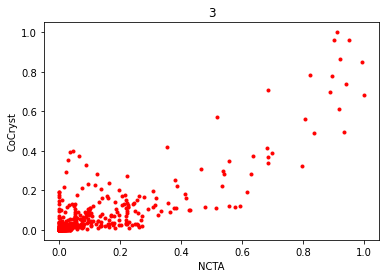

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


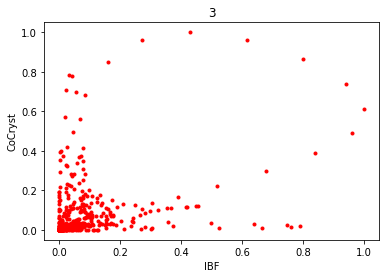

CO2
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


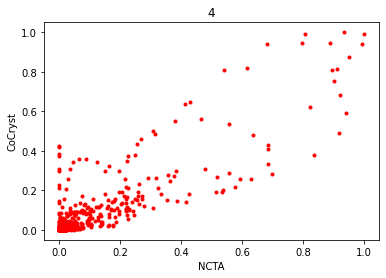

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


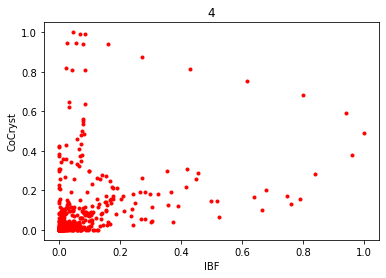

CO3
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


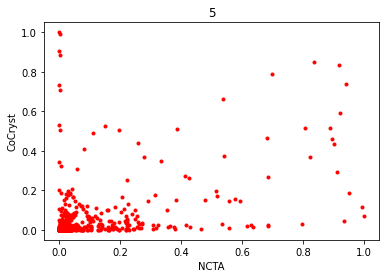

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


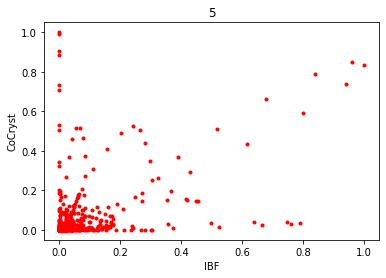

CO4
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


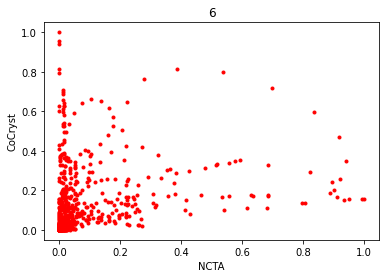

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


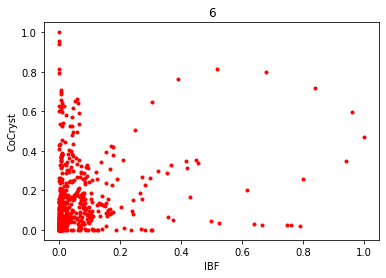

CO5
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


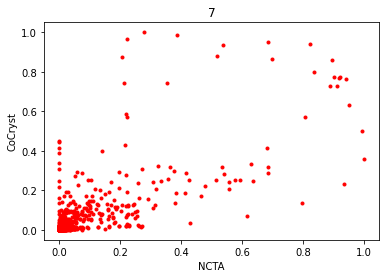

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


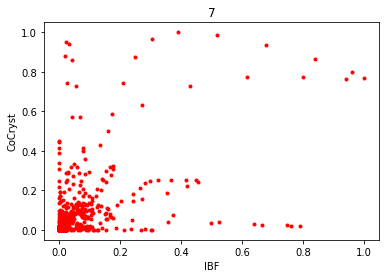

CO6
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


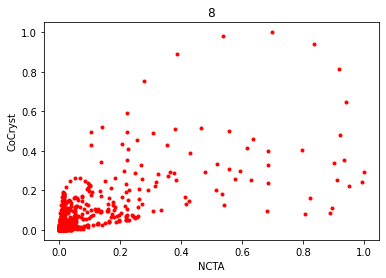

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


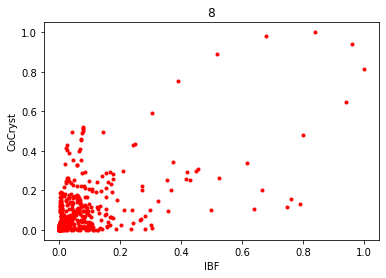

CO7
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


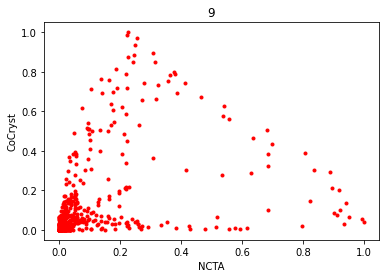

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


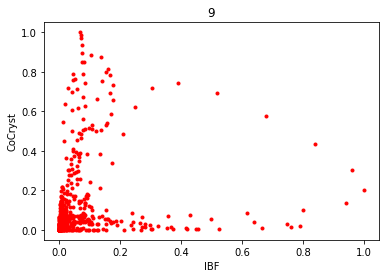

CO8
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


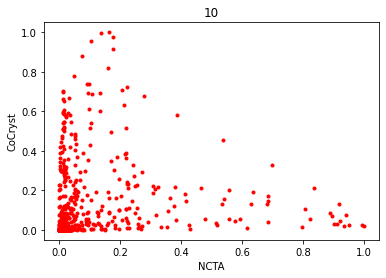

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


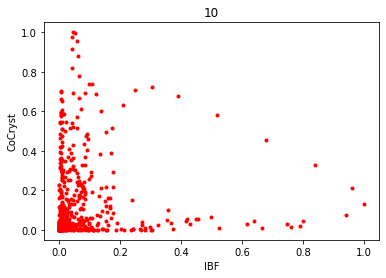

CO9
contains -NCTA- and -IBF- CoCryst
checking: -NCTA- vs. -NCTA- and -IBF- CoCryst


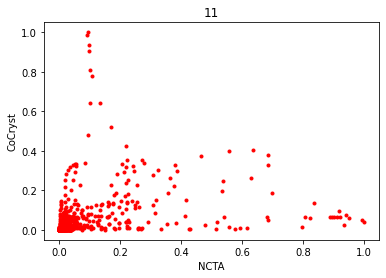

checking: -IBF- vs. -NCTA- and -IBF- CoCryst


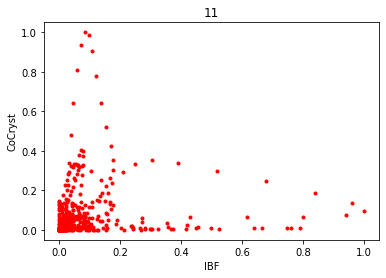

DI1
contains -IBF- dimer
checking: -IBF- vs. -IBF- dimer


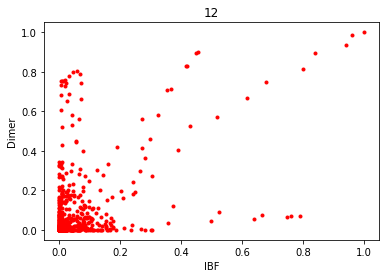

DI2
contains -IBF- dimer
checking: -IBF- vs. -IBF- dimer


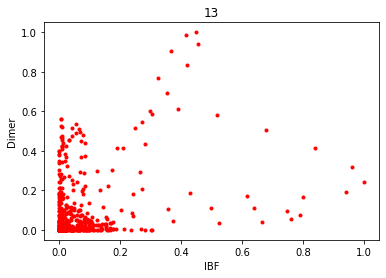

DI3
contains -IBF- dimer
checking: -IBF- vs. -IBF- dimer


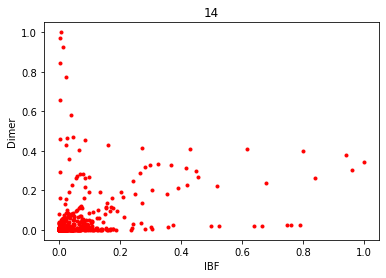

DN1
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


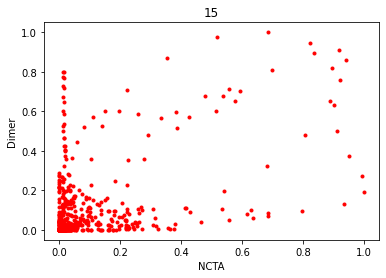

DN2
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


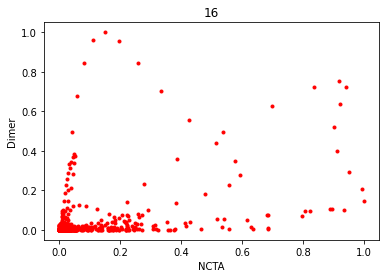

DN3
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


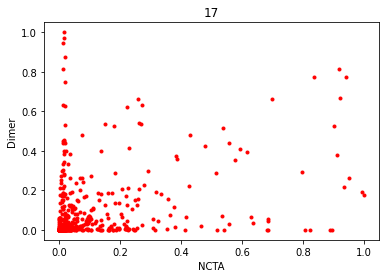

DN4
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


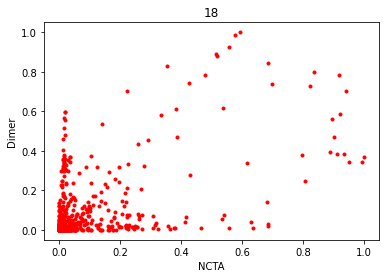

DN5
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


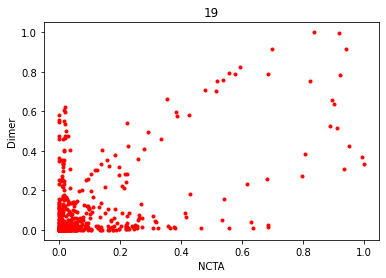

DN6
contains -NCTA- dimer
checking: -NCTA- vs. -NCTA- dimer


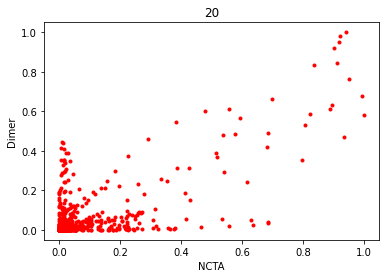

In [ ]:
for item in range(1,FP_spectra_norm.shape[0]):
  #"""
  print(List[item-1])
  #"""
  if 'DI' in List[item-1]:
    #"""
    print('contains -IBF- dimer')
    print('checking: -IBF- vs. -IBF- dimer')
    plt.figure()
    plt.plot(FP_spectra_norm[1,:], FP_spectra_norm[item,:], 'r.')
    plt.xlabel('IBF')
    plt.ylabel('Dimer')
    plt.title(item)
    plt.show()
    #"""
  if 'DN' in List[item-1]:
    #"""
    print('contains -NCTA- dimer')
    print('checking: -NCTA- vs. -NCTA- dimer')
    plt.figure()
    plt.plot(FP_spectra_norm[2,:], FP_spectra_norm[item,:], 'r.')
    plt.xlabel('NCTA')
    plt.ylabel('Dimer')
    plt.title(item)
    plt.show()
    #"""
  if 'CO' in List[item-1]:
    #"""
    print('contains -NCTA- and -IBF- CoCryst')
    print('checking: -NCTA- vs. -NCTA- and -IBF- CoCryst')
    plt.figure()
    plt.plot(FP_spectra_norm[2,:], FP_spectra_norm[item,:], 'r.')
    plt.xlabel('NCTA')
    plt.ylabel('CoCryst')
    plt.title(item)
    plt.show()
    print('checking: -IBF- vs. -NCTA- and -IBF- CoCryst')
    plt.figure()
    plt.plot(FP_spectra_norm[1,:], FP_spectra_norm[item,:], 'r.')
    plt.xlabel('IBF')
    plt.ylabel('CoCryst')
    plt.title(item)
    plt.show()   
    #"""

# Bayesian Modeling applied to fingerprints only

save format for array Observed_DN_no = [DI, CO]
[25. 75.]


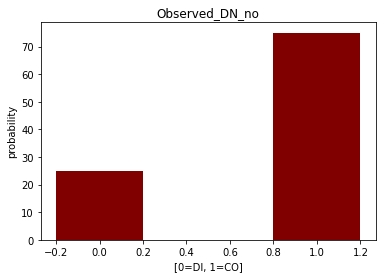

save format for array Observed_DN_yes = [DI, CO, DN]
[16.66666667 50.         33.33333333]


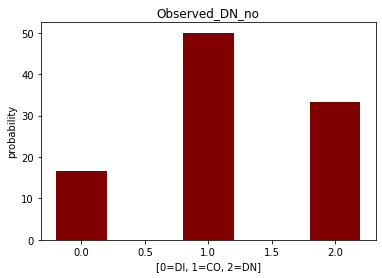

working on DN_yes case
[0.16667167 0.499995   0.33333333]
[0.16671665 0.49995001 0.33333333]
[0.16716517 0.4995015  0.33333333]
[0.16912972 0.49753695 0.33333333]
[0.17152104 0.49514563 0.33333333]
[0.17610063 0.49056604 0.33333333]
[0.20512821 0.46153846 0.33333333]
[0.29166667 0.375      0.33333333]


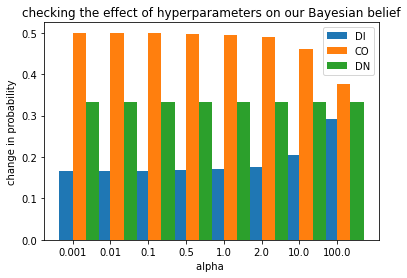

In [ ]:
#Observed_DN_no 
#Observed_DN_yes 
print('save format for array Observed_DN_no = [DI, CO]')
print(Observed_DN_no)
plt.figure()
plt.bar(range(len(Observed_DN_no)), Observed_DN_no, \
        color ='maroon', width = 0.4)
plt.xlabel('[0=DI, 1=CO]')
plt.ylabel('probability')
plt.title('Observed_DN_no')
plt.show()
print('save format for array Observed_DN_yes = [DI, CO, DN]')
print(Observed_DN_yes)
plt.figure()
plt.bar(range(len(Observed_DN_yes)), Observed_DN_yes, \
        color ='maroon', width = 0.4)
plt.xlabel('[0=DI, 1=CO, 2=DN]')
plt.ylabel('probability')
plt.title('Observed_DN_no')
plt.show()
print('working on DN_yes case')
species = ['DI', 'CO', 'DN']
c = Observed_DN_yes # Observations
pseudocounts = np.array([0.001, 0.01, 0.1, 0.5, 1, 2, 10, 100])
expected = np.zeros((len(pseudocounts),len(species)))
for pseudocount in range(len(pseudocounts)):
  alphas = np.array([1, 1, 1]) * pseudocounts[pseudocount] #Pseudocounts
  expected[pseudocount,:] = (alphas + c) / (c.sum() + alphas.sum())
  print(expected[pseudocount,:])
ind = np.arange(len(pseudocounts))
width = 0.35   
plt.figure()
plt.bar(ind + 0 * width, expected[:,0], width, label='DI')
plt.bar(ind + 1 * width, expected[:,1], width, label='CO')
plt.bar(ind + 2 * width, expected[:,2], width, label='DN')
plt.xlabel('alpha ')
plt.ylabel('change in probability')
plt.title('checking the effect of hyperparameters on our Bayesian belief')
plt.xticks(ind + width / 2, (pseudocounts[0], pseudocounts[1], \
                             pseudocounts[2], pseudocounts[3], \
                             pseudocounts[4], pseudocounts[5], \
                             pseudocounts[6], pseudocounts[7]))
plt.legend(loc='best')
plt.show()

Moving to PyMC3

In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4
import arviz as az
import pymc3 as pm
from pymc3 import Model, Normal, Slice, sample, traceplot

In [ ]:
alphas = np.array([1, 1, 1])
import math
c = np.floor(Observed_DN_yes)
with pm.Model() as model: # Create model
    # Parameters of the Multinomial are from a Dirichlet
    parameters = pm.Dirichlet('parameters', a=alphas, shape=len(species))
    # Observed data is from a Multinomial distribution
    observed_data = pm.Multinomial('observed_data', n=sum(c), p=parameters, shape=len(species), observed=c)  

In [ ]:
with model:
  # Sample from the posterior
  trace = pm.sample(draws=1000, chains=2, tune=500, discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [parameters]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 1237.70it/s]


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6127aa6a58>,
      dtype=object)

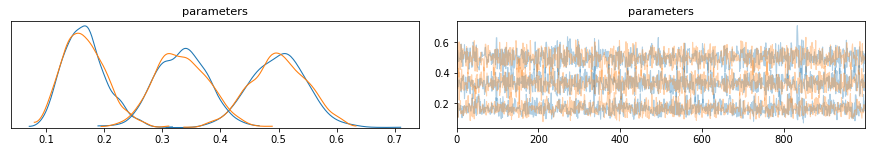

In [ ]:
#traceplot(trace)
az.plot_trace(trace, compact=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f612d167160>,
      dtype=object)

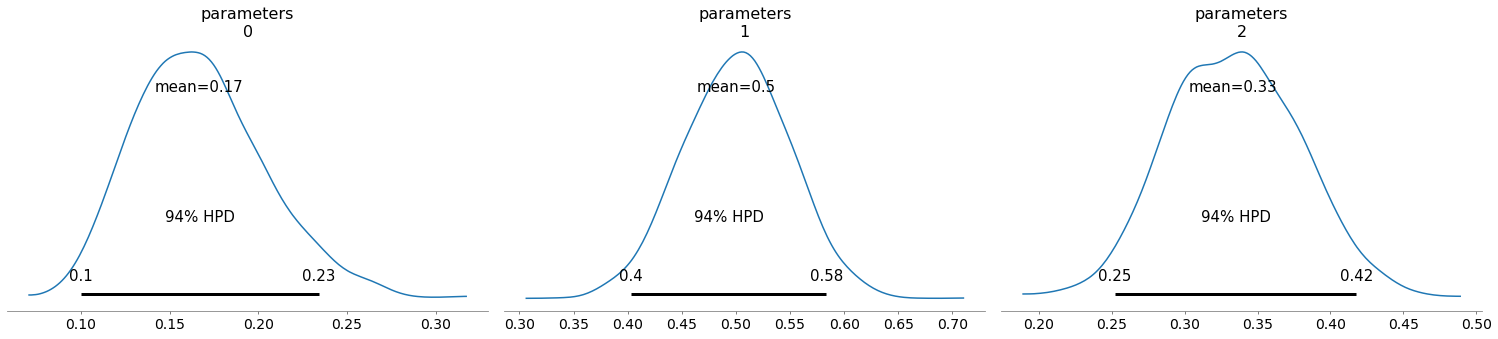

In [ ]:
az.plot_posterior(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f612662fa90>],
      dtype=object)

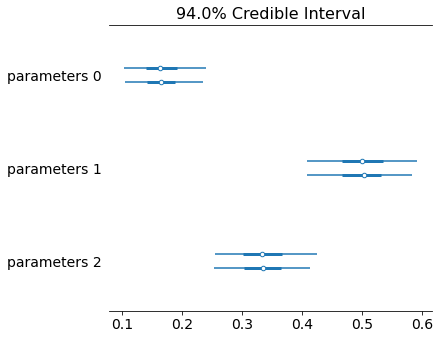

In [ ]:
az.plot_forest(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6127d410f0>,
      dtype=object)

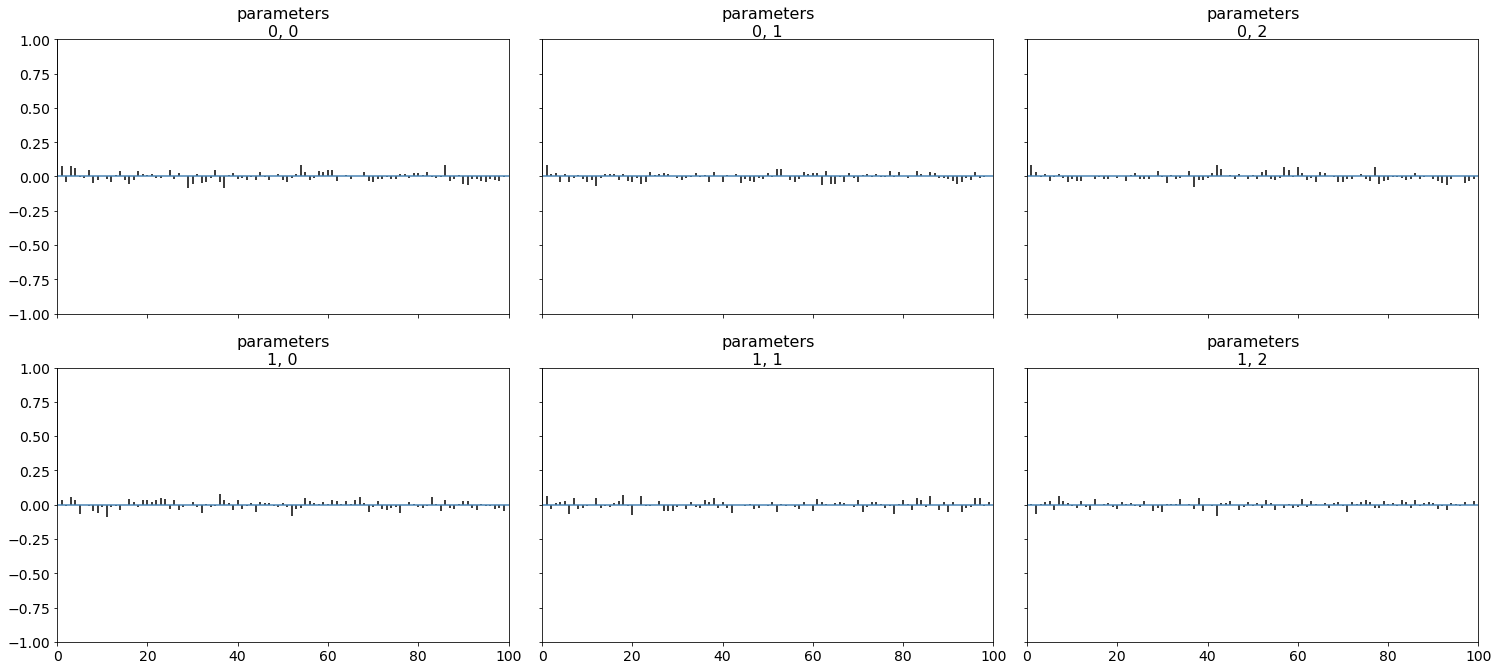

In [ ]:
az.plot_autocorr(trace)

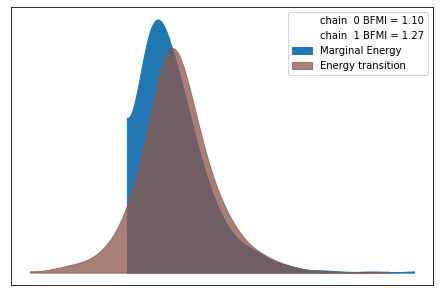

In [ ]:
az.plot_energy(trace)

In [ ]:
with model:
    samples = pm.sample_ppc(trace, samples = 1000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  
/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:01<00:00, 731.14it/s]


# Ugrading to include dummy MIXTURE data 

In [ ]:
Observed_DN_yes_Corr = np.array([np.floor(Observed_DN_yes[0]), \
                                 np.floor(Observed_DN_yes[1]), \
                            100 - np.floor(Observed_DN_yes[0]) \
                            - np.floor(Observed_DN_yes[1])])
ObservedPairs = Observed_DN_yes_Corr
for mixture in range(MIX_frQ.shape[0]):
  nDI=0
  nDN=0
  nCO=0
  for pair in range(MIX_frQ.shape[1]):
    if 'DI' in List[pair + 2]:
      nDI = nDI + MIX_frQ[mixture, pair]
    if 'DN' in List[pair + 2]:
      nDN = nDN + MIX_frQ[mixture, pair]
    if 'CO' in List[pair + 2]:
      nCO = nCO + MIX_frQ[mixture, pair]
  Instance = np.array([100 * nDI / (nDI + nDN + nCO), \
                100 * nCO / (nDI + nDN + nCO), \
                100 * nDN / (nDI + nDN + nCO)])
  Instance_Corr = np.array([np.floor(Instance[0]), np.floor(Instance[1]), \
                            100 - np.floor(Instance[0]) - np.floor(Instance[1])])
  ObservedPairs = np.vstack((ObservedPairs, Instance_Corr))

In [ ]:
#print(ObservedPairs)

In [ ]:
alphas = np.array([1, 1, 1])
import math
c = np.floor(ObservedPairs)
with pm.Model() as model: # Create model
    # Parameters of the Multinomial are from a Dirichlet
    parameters = pm.Dirichlet('parameters', a=alphas, shape=len(species))
    # Observed data is from a Multinomial distribution
    observed_data = pm.Multinomial('observed_data', n=100, p=parameters, shape=len(species), observed=c)  

In [ ]:
with model:
  # Sample from the posterior
  trace = pm.sample(draws=1000, chains=5, tune=1000, discard_tuned_samples=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (5 chains in 1 job)
NUTS: [parameters]
Sampling chain 4, 0 divergences: 100%|██████████| 2000/2000 [01:08<00:00, 29.34it/s]
The acceptance probability does not match the target. It is 0.8884899162927771, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9034593883993988, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9159529593837588, but should be close to 0.8. Try to increase the number of tuning steps.


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f611b521630>,
      dtype=object)

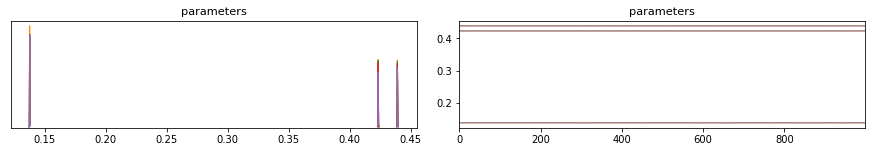

In [ ]:
az.plot_trace(trace, compact=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f611b3b1ef0>,
      dtype=object)

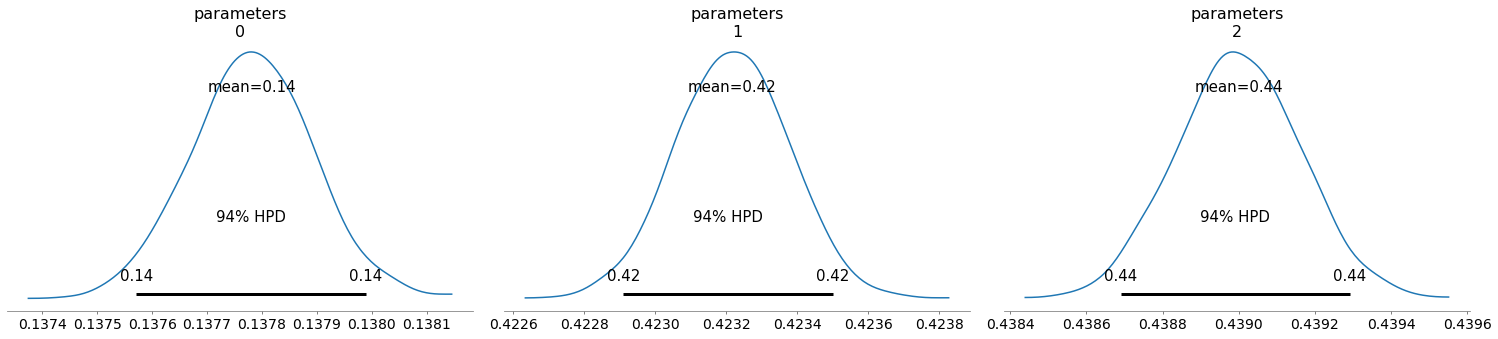

In [ ]:
az.plot_posterior(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f611b1187f0>],
      dtype=object)

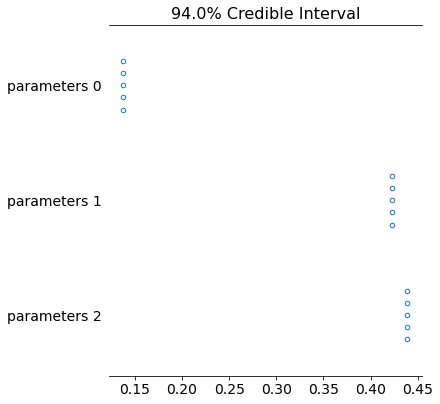

In [ ]:
az.plot_forest(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f611ac80f28>,
      dtype=object)

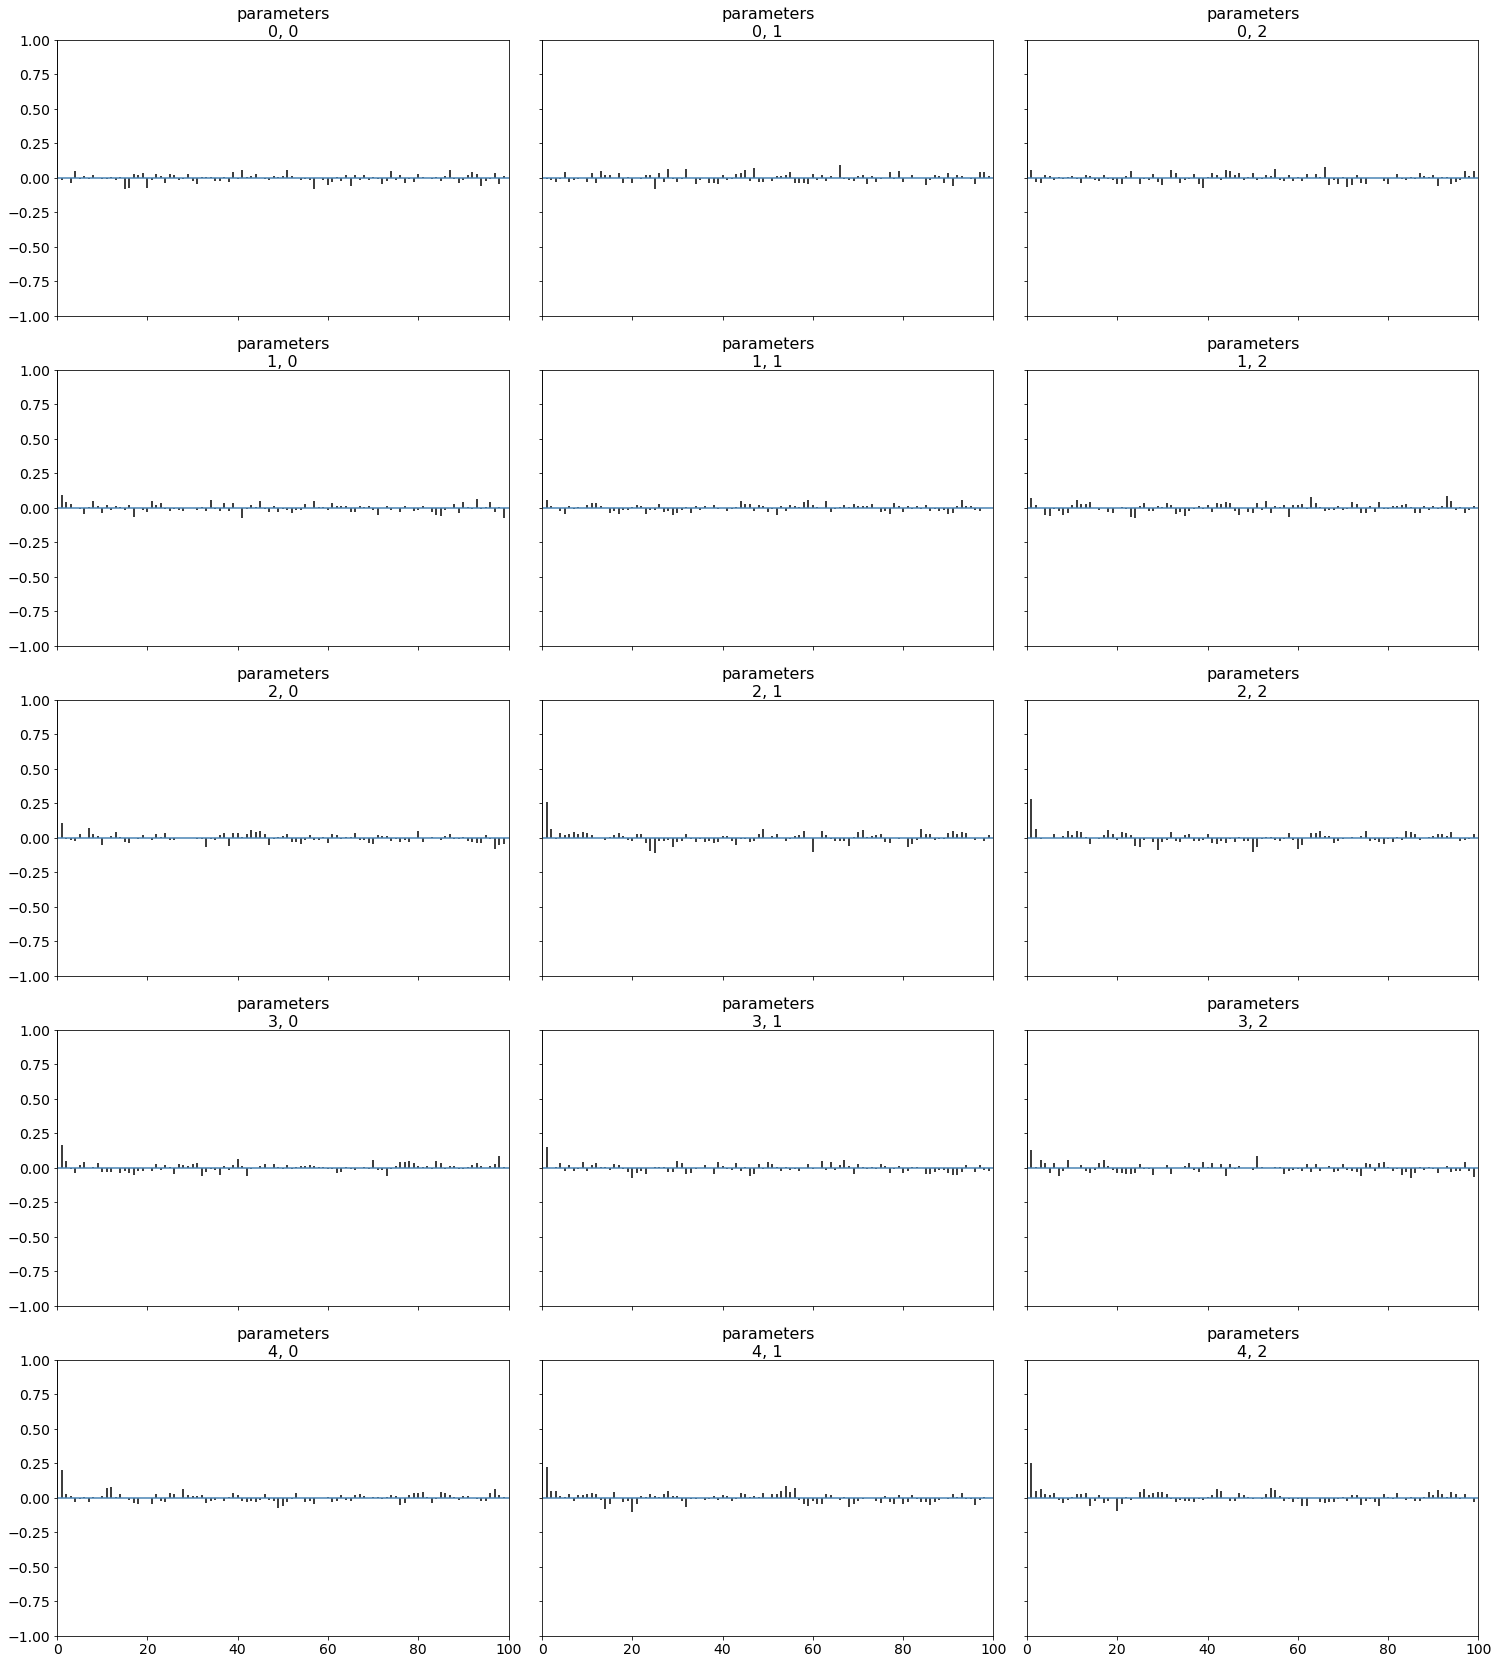

In [ ]:
az.plot_autocorr(trace)

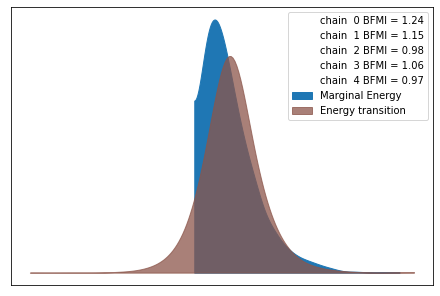

In [ ]:
az.plot_energy(trace)

# Power series 